In [19]:
from astropy.io import fits
import numpy as np
import sep

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
import matplotlib.colors as colors

rcParams['figure.figsize'] = [10.,8.]

In [21]:
def img_analysis(image, thresh, bitswap=False):
    data = fits.getdata(image)
    if bitswap:
        data = data.byteswap(inplace=True).newbyteorder()
    m = np.mean(data)
    s = np.std(data)
    plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
    plt.colorbar()
    plt.show()

    bkg = sep.Background(data)
    bkg = sep.Background(data, mask=None, bw=64, bh=64, fw=3, fh=3)
    print("Global Background: "+str(bkg.globalback))
    print("Global RMS: "+str(bkg.globalrms))
    bkg_image = bkg.back()
    plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
    plt.colorbar()
    plt.show()

    bkg_rms = bkg.rms()
    data_sub = data - bkg
    
    plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
    plt.colorbar()
    plt.show()

    objects = sep.extract(data_sub, thresh, err=bkg.globalrms)
    print("Number of objects: = "+str(len(objects)))

    # plot background-subtracted image
    fig, ax = plt.subplots()
    m = np.mean(data_sub)
    s = np.std(data_sub)
    im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
                   vmin=m-s, vmax=m+s, origin='lower')

    # plot an ellipse for each object
    for i in range(len(objects)):
        e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                    width=6*objects['a'][i],
                    height=6*objects['b'][i],
                    angle=objects['theta'][i] * 180. / np.pi)
        e.set_facecolor('none')
        e.set_edgecolor('red')
        ax.add_artist(e)
    plt.savefig('image')
    return objects

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


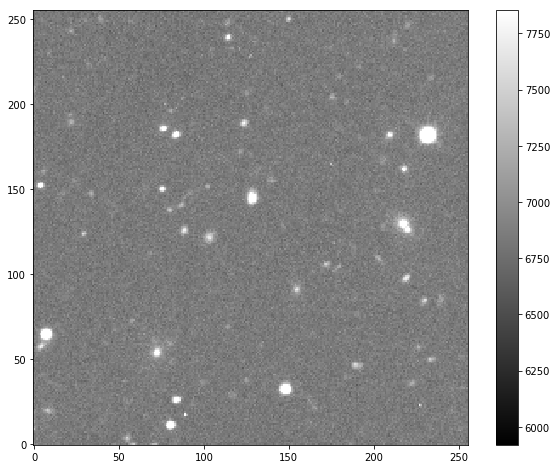

Global Background: 6852.04931640625
Global RMS: 65.46174621582031


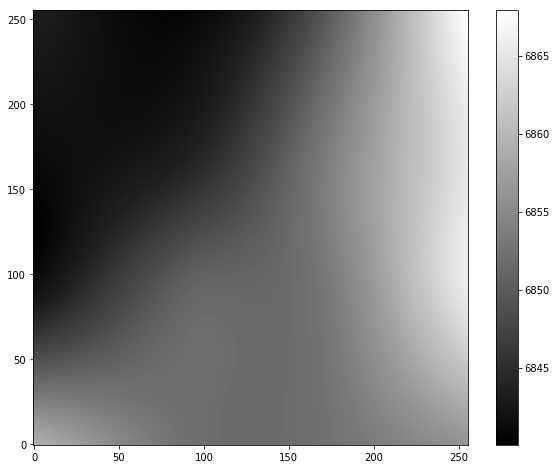

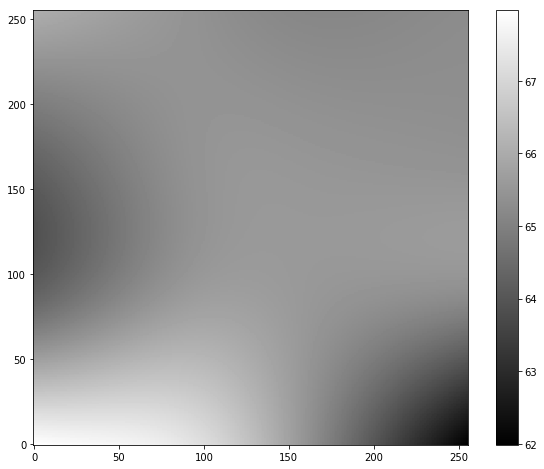

Number of objects: = 68


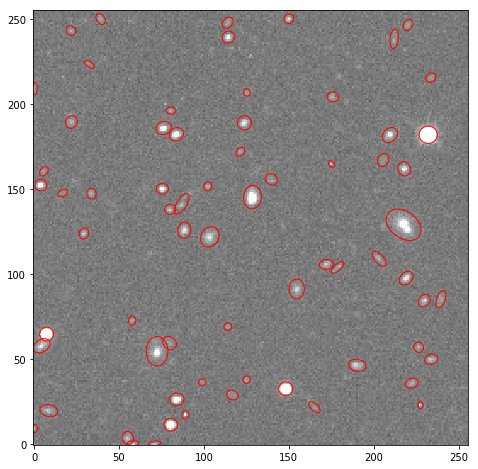

In [22]:
objects = img_analysis("image.fits", thresh=1.5)

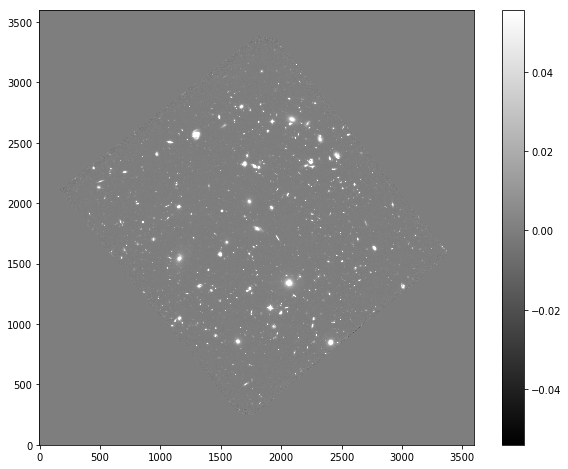

Global Background: 0.0
Global RMS: 0.0005398219218477607


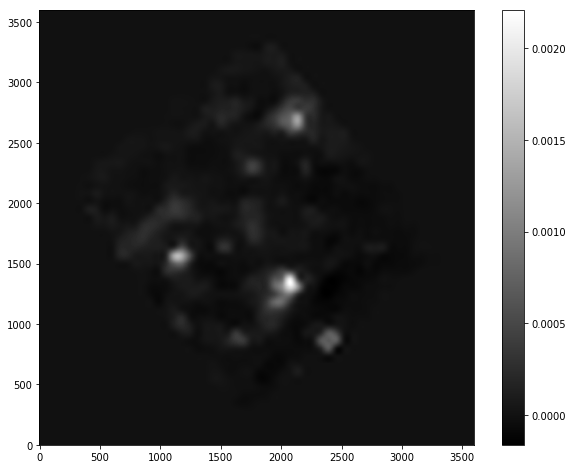

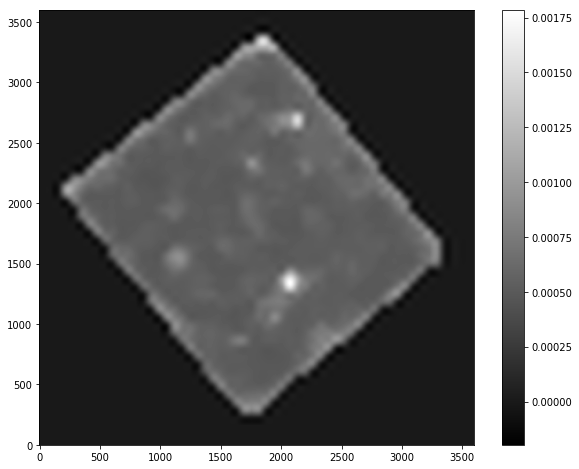

Number of objects: = 8640


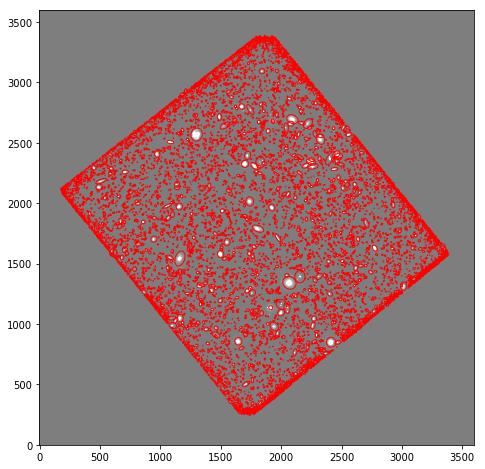

In [23]:
objects = img_analysis("f105w.fits", 1.5, bitswap=True)

In [24]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

## Multi color image

In [25]:
image = fits.getdata("image.fits")
image = image.byteswap(inplace=True).newbyteorder()
image = image/np.max(image)

f105w = fits.getdata("f105w.fits")
f105w = f105w.byteswap(inplace=True).newbyteorder()
f105w = f105w/np.max(f105w)

f125w = fits.getdata("f125w.fits") 
f125w = f125w.byteswap(inplace=True).newbyteorder() 
f125w = f125w/np.max(f125w)

f160w = fits.getdata("f160w.fits") 
f160w = f160w.byteswap(inplace=True).newbyteorder() 
f160w = f160w/np.max(f160w)

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


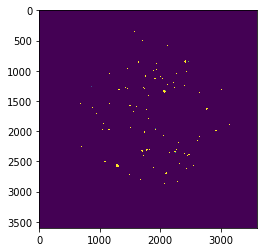

In [10]:
im = (np.abs(np.stack((f160w, f125w, f105w)).transpose()))**(0.1)
plt.imshow(f105w, vmin = np.abs(np.mean(f105w)-np.std(f105w)), vmax=np.abs(np.mean(f105w)+np.std(f105w)))

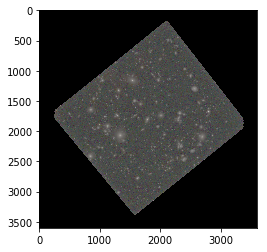

In [11]:
plt.imshow(im, vmin=np.mean(im)-np.std(im), vmax=np.mean(im)+np.std(im), interpolation = "nearest")
plt.show()